In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-10 11:36:55,060: Credentials are already in use. The existing account in the session will be replaced.


### Draw
Now that we have a basic circuit we can start looking at different things I want to just say we have different arguments in the .draw() attribute of a QuantumCircuit() so we can see that we can do qc_1.draw('mpl'), qc_1.draw('latex'), qc_1.draw(), ... There is also a way to save the png I don't remember this off rip so someone can come in and correct this when it gets to it but I will sheow the drawing techniques. 

In [4]:
qc_1.draw('text')

q0_0: 
      
q0_1: 
      
c0: 2/

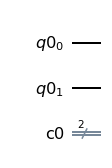

In [5]:
qc_1.draw('mpl')

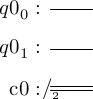

In [6]:
qc_1.draw('latex')

In [7]:
qc_1.draw('text')

q0_0: 
      
q0_1: 
      
c0: 2/